In [1]:
from QuditsOnQubits import create_ame43
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from QuditsOnQubits import create_ame43, create_graph_ghz, create_ghz
import igraph as ig

In [3]:
ame43 = create_ame43()

In [4]:
ghz = create_ghz()[0]

In [5]:
stateghz = create_ghz()[1]

stateghz.draw('latex')

<IPython.core.display.Latex object>

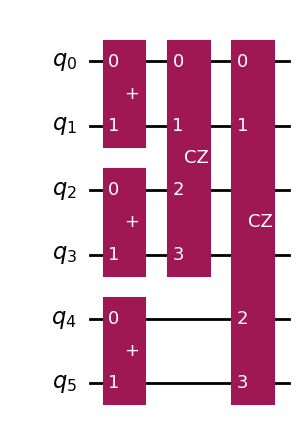

In [197]:
ghz.draw('mpl')

In [6]:
sq = ig.Graph()

#dodawanie wezlow
sq.add_vertices(4)

#dodawanie kolejnych krawedzi
# SQ.add_edge(0, 1)
# SQ.add_edge(1, 2)
# SQ.add_edge(3, 0)
# SQ.add_edge(2, 3)
# SQ.add_edge(2, 3)

sq.add_edges([(0, 1), (1, 2), (2, 3), (2, 3), (3, 0)])

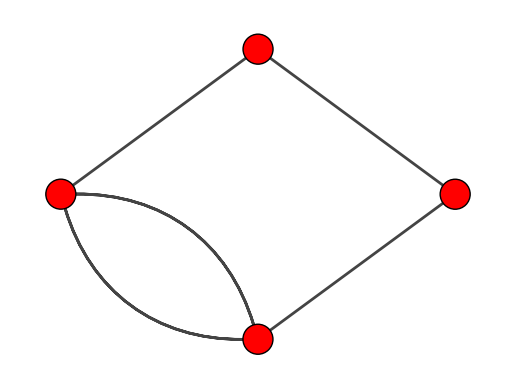

In [7]:
fig, ax = plt.subplots()
ig.plot(sq, target=ax)

In [131]:
ame43algo = create_graph_ghz(sq)

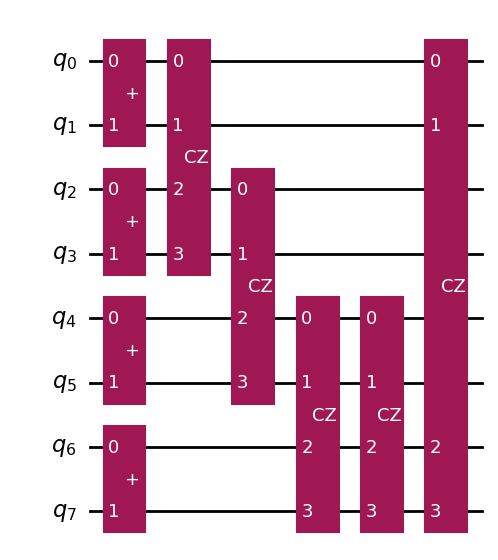

In [132]:
ame43algo.draw('mpl')

In [168]:
from qiskit.quantum_info import partial_trace

In [172]:
partial_trace(Statevector(ame43algo), [0,1,2,3,4,5]).draw('latex')

<IPython.core.display.Latex object>

In [3]:
Statevector(ame43).draw('latex')

<IPython.core.display.Latex object>

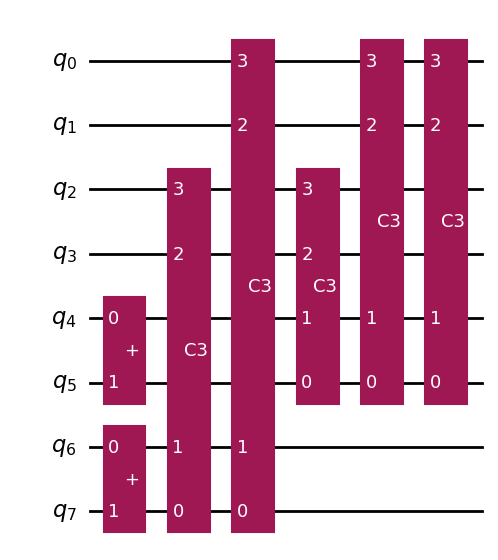

In [104]:
ame43.draw('mpl')

In [4]:
from qiskit.quantum_info import partial_trace

In [5]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

with open('ame43_v2.qpy', 'rb') as fd:
    ame43_v2 = qpy.load(fd)[0]

with open('ame43fig12.qpy', 'rb') as fd:
    ame43fig12 = qpy.load(fd)[0]

In [7]:
Statevector(Fgate).draw('latex')

<IPython.core.display.Latex object>

In [11]:
from qiskit.synthesis import TwoQubitWeylDecomposition

Czy tutaj moge dac 1 na koncu diag bo |11>

In [12]:
omega = np.exp(2j * np.pi / 3)

D1 = np.diag([1, omega, omega*omega, 1])
D1dag = D1.conjugate().transpose()

D2 = np.diag([1, omega*omega, omega, 1])
D2dag = D2.conjugate().transpose()

Fmtx = 1/np.sqrt(3) * np.array([[1, 1, 1, 0], [1, omega, omega * omega, 0], [1, omega*omega, omega, 0], [0, 0, 0, np.sqrt(3)]])
Fmtx = Fmtx.conjugate().transpose()

Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]

U_XZ = Fmtx @ D1dag
U_XZ_dag = U_XZ.conjugate().transpose()

In [13]:
(U_XZ @ X @ Z @ U_XZ_dag).round(3)

array([[ 0. +0.j   ,  0. -0.j   , -0.5-0.866j,  0. +0.j   ],
       [-0.5+0.866j, -0. -0.j   , -0. +0.j   ,  0. +0.j   ],
       [ 0. +0.j   ,  1. -0.j   , -0. +0.j   ,  0. +0.j   ],
       [ 0. +0.j   ,  0. +0.j   ,  0. +0.j   ,  1. +0.j   ]])

In [94]:
from numpy.linalg import inv
(Z @ inv(Fmtx)).round(3)

array([[ 0.577+0.j ,  0.577+0.j ,  0.577-0.j ,  0.   +0.j ],
       [-0.289+0.5j, -0.289-0.5j,  0.577-0.j ,  0.   +0.j ],
       [-0.289-0.5j, -0.289+0.5j,  0.577-0.j ,  0.   +0.j ],
       [ 0.   +0.j ,  0.   +0.j ,  0.   +0.j ,  1.   +0.j ]])

In [96]:
(Z @ inv(Fmtx) @ Fmtx).round(3)

array([[ 1. +0.j   ,  0. -0.j   , -0. +0.j   ,  0. +0.j   ],
       [ 0. +0.j   , -0.5+0.866j, -0. -0.j   ,  0. +0.j   ],
       [ 0. +0.j   ,  0. -0.j   , -0.5-0.866j,  0. +0.j   ],
       [ 0. +0.j   ,  0. +0.j   ,  0. +0.j   ,  1. +0.j   ]])

In [97]:
omega

np.complex128(-0.4999999999999998+0.8660254037844387j)

jak rozwiazac D @ X @ Z @ D_dag = Z

In [14]:
weylDecomCirc = TwoQubitWeylDecomposition(D1dag)
D1dagGate = weylDecomCirc.circuit()
D1dagGate.name = "D1dag"

weylDecomCirc = TwoQubitWeylDecomposition(D2dag)
D2dagGate = weylDecomCirc.circuit()
D2dagGate.name = "D2dag"

In [7]:
operators = []

In [8]:
G1G2 = QuantumCircuit(8)
G1G2.append(Xgate, [0, 1])
G1G2.append(Zgate, [0, 1])
G1G2.append(Zgate, [2, 3])
G1G2.append(Xgate, [2, 3])
G1G2.append(Zgate, [4, 5])
G1G2.append(Zgate, [6, 7])
operators.append(G1G2)

In [9]:
G1G22 = QuantumCircuit(8)
G1G22.append(Xgate, [0, 1])
G1G22.append(Zgate, [0, 1])
G1G22.append(Zgate, [0, 1])
G1G22.append(Zgate, [2, 3])
G1G22.append(Xgate, [2, 3])
G1G22.append(Xgate, [2, 3])
G1G22.append(Zgate, [4, 5])
G1G22.append(Zgate, [4, 5])
G1G22.append(Zgate, [6, 7])
operators.append(G1G22)

In [10]:
G3 = QuantumCircuit(8)
G3.append(Zgate, [2, 3])
G3.append(Xgate, [4, 5])
G3.append(Zgate, [6, 7])
G3.append(Zgate, [6, 7])
operators.append(G3)

In [11]:
G1G4 = QuantumCircuit(8)
G1G4.append(Xgate, [0, 1])
G1G4.append(Zgate, [0, 1])
G1G4.append(Zgate, [2, 3])
G1G4.append(Zgate, [4, 5])
G1G4.append(Zgate, [4, 5])
G1G4.append(Zgate, [6, 7])
G1G4.append(Xgate, [6, 7])
operators.append(G1G4)

In [14]:
G1 = QuantumCircuit(8)
G1.append(Xgate, [0, 1])
G1.append(Zgate, [2, 3])
G1.append(Zgate, [6, 7])

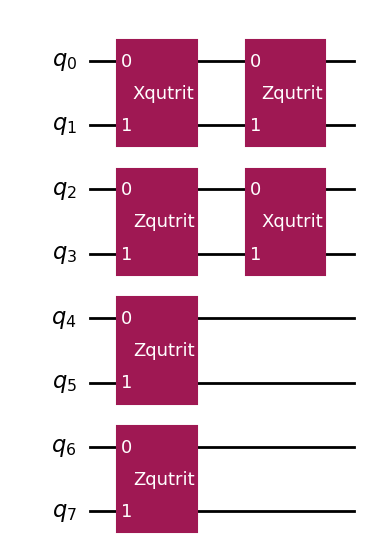

In [21]:
G1G2.draw("mpl")

In [12]:
from qiskit.quantum_info import Operator

In [17]:
Statevector(ame43fig12).draw("latex")

<IPython.core.display.Latex object>

In [19]:
Bame = Operator(G1) + Operator(G1G22) + 0.5 * (Operator(G1G2) + Operator(G1G4)) + Operator(G3) + (Operator(G1) + Operator(G1G22) + 0.5 * (Operator(G1G2) + Operator(G1G4)) + Operator(G3)).conjugate().transpose()

In [20]:
Statevector(ame43fig12).expectation_value(Bame)

np.complex128(6.975198227344117e-31+0j)

In [153]:
final_circs = []

qutryt_badany = [0, 1]

tempcirc = ame43_v2.copy()
tempcirc.append(FDAGgate, qutryt_badany)
tempcirc.measure_all()
final_circs.append(tempcirc)

tempcirc = ame43_v2.copy()
tempcirc.append(D1dagGate, qutryt_badany)
tempcirc.append(FDAGgate, qutryt_badany)
tempcirc.measure_all()
final_circs.append(tempcirc)

tempcirc = ame43_v2.copy()
tempcirc.append(D2dagGate, qutryt_badany)
tempcirc.append(FDAGgate, qutryt_badany)
tempcirc.measure_all()
final_circs.append(tempcirc)

# for i in operators:
#     tempcirc = ame43_v2.copy()
#     tempcirc.append(i, [0, 1])
#     tempcirc.measure_all()
#     final_circs.append(tempcirc)

In [11]:
with open('ame43opti.qpy', 'rb') as fd:
    ame43opti = qpy.load(fd)[0]

In [26]:
final_circs = []

qutryt_badany = [0, 1]

tempcirc = ame43fig12.copy()
tempcirc.append(FDAGgate, qutryt_badany)
tempcirc.measure_all()
final_circs.append(tempcirc)

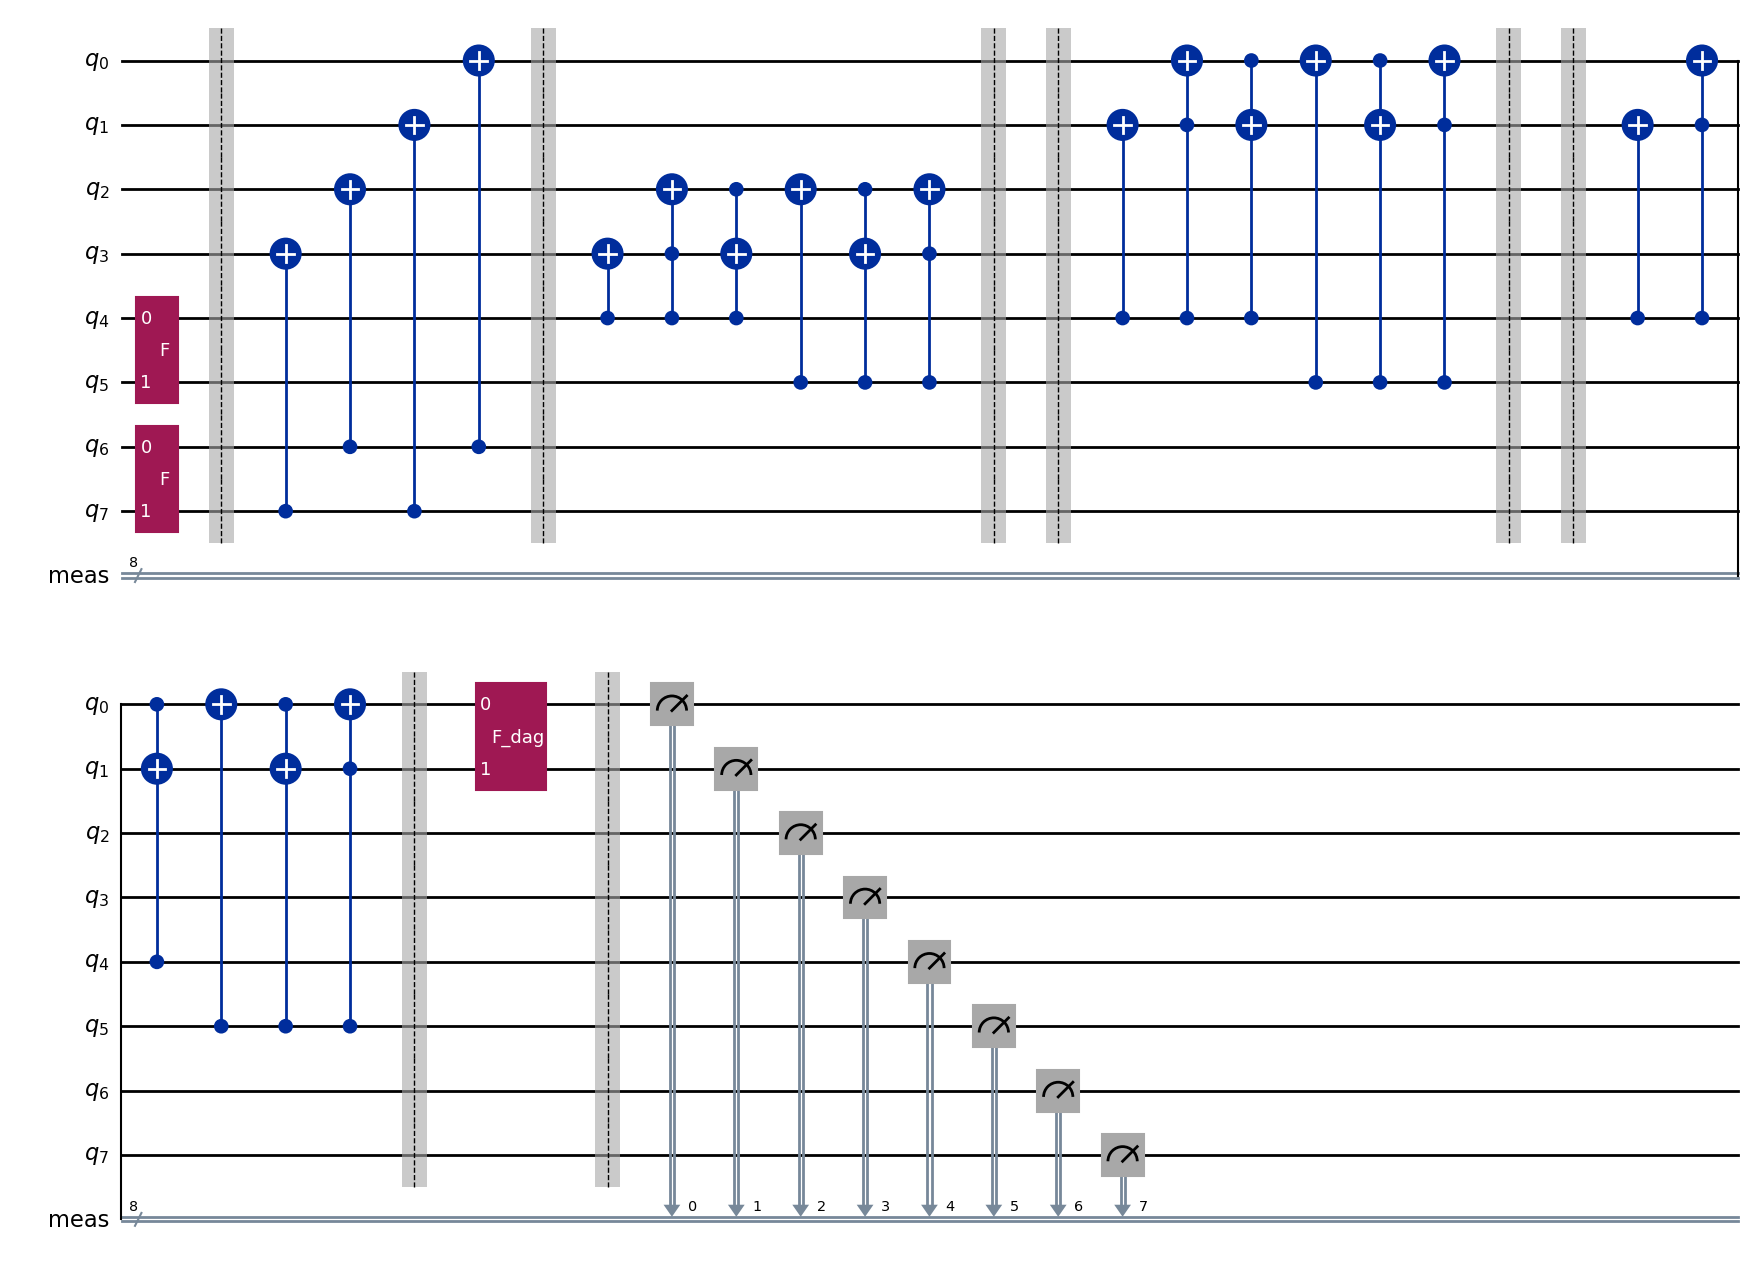

In [27]:
final_circs[0].draw('mpl')

In [16]:
final_circs = []

qutryt_badany = [0, 1]

tempcirc = ghz.copy()
tempcirc.append(FDAGgate, qutryt_badany)
tempcirc.measure_all()
final_circs.append(tempcirc)

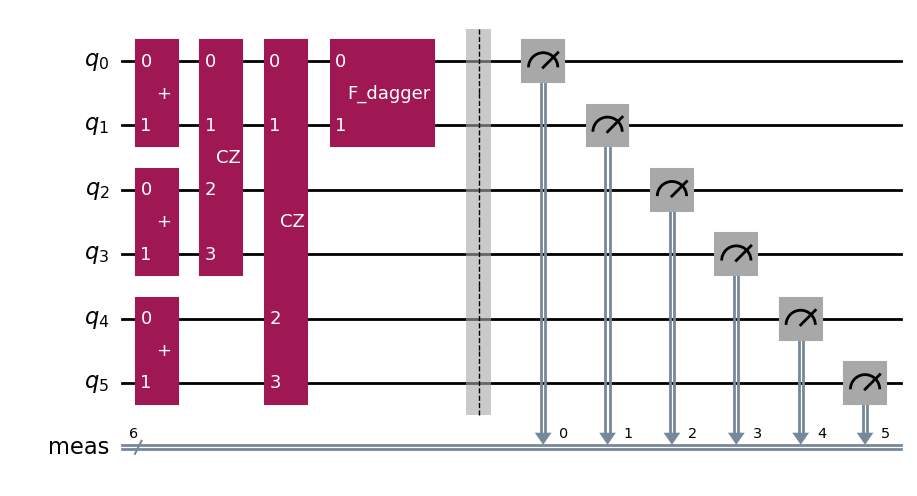

In [17]:
final_circs[0].draw('mpl')

In [15]:
bitstrings = [
    "00000000",  #  (0,0,0,0)
    "00010110",  #  (0,1,1,2)
    "00101001",  #  (0,2,2,1)
    "01000101",  #  (1,0,1,1)
    "01011000",  #  (1,1,2,0)
    "01100010",  #  (1,2,0,2)
    "10001010",  #  (2,0,2,2)
    "10010001",  #  (2,1,0,1)
    "10100100",  #  (2,2,1,0)
]

psi_ideal = np.zeros(2**8, dtype=complex)
for bs in bitstrings:
    index = int(bs, 2)   # zamienia binarny łańcuch na liczbę (np. "00010110" → 22)
    psi_ideal[index] = 1/3

In [18]:
Statevector(ame43_v2).draw('latex')

<IPython.core.display.Latex object>

In [16]:
Statevector(psi_ideal).draw('latex')

<IPython.core.display.Latex object>

In [17]:
Statevector(ame43opti).draw('latex')

<IPython.core.display.Latex object>

In [19]:
Statevector(FDAGgate).draw('latex')

<IPython.core.display.Latex object>

In [28]:
def exp_Ax_first_qutrit(counts):

    omega = np.exp(2j * np.pi / 3)
    phase = {"00": 0, "01": 1, "10": 2}

    shots = sum(counts.values())
    exp_val = 0 + 0j

    for bits, n in counts.items():
        p0 = bits[-2:]
        print(p0)
        exp_val += (n / shots) * omega**phase[p0]

    return exp_val

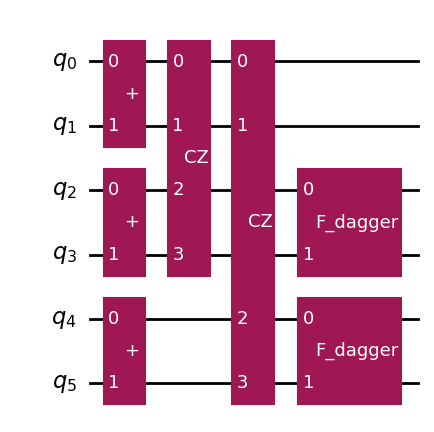

In [25]:
ghz = create_ghz()[0]
ghz.append(FDAGgate, [2, 3])
ghz.append(FDAGgate, [4, 5])
#ghz.append(FDAGgate, [0, 1])

ghz.draw("mpl")

In [26]:
Statevector(ghz).draw('latex')

<IPython.core.display.Latex object>

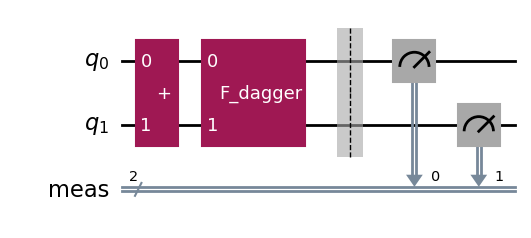

In [37]:
test_pomiaru = QuantumCircuit(2)
test_pomiaru.append(Fgate, [0, 1])
test_pomiaru.append(FDAGgate, [0, 1])
test_pomiaru.measure_all()
test_pomiaru.draw('mpl')

In [29]:
sampler = StatevectorSampler()

job = sampler.run([final_circs[0]], shots = 10000)
data_pub = job.result()[0].data
counts = data_pub.meas.get_counts()

exp_Ax_first_qutrit(counts)

00
10
00
01
10
01
01
01
00
00
10
01
10
01
10
00
10
10
00
10
00
01
00
01
10
00
01


np.complex128(0.01059999999999994-0.004156921938165192j)

In [242]:
counts

{'10011000': 359,
 '01001001': 375,
 '01010110': 350,
 '10100101': 386,
 '00100010': 356,
 '01010010': 342,
 '00100110': 344,
 '10101001': 362,
 '01101000': 378,
 '10000110': 407,
 '01000001': 356,
 '01011010': 382,
 '01000101': 354,
 '00010001': 431,
 '10010100': 398,
 '10010000': 388,
 '10001010': 364,
 '00011001': 351,
 '01100100': 357,
 '01100000': 372,
 '00101010': 372,
 '10000010': 346,
 '00000000': 356,
 '00010101': 411,
 '10100001': 371,
 '00001000': 364,
 '00000100': 368}

In [139]:
from collections import Counter

def tot_statistics(counts):
    """
    Zwraca Counter({0: n0, 1: n1, 2: n2})
    dla s_tot = (s1+s2+s4) mod 3,
    gdzie s1,s2,s4 zliczamy z par:
       bits[-2:], bits[-4:-2], bits[-8:-6]
    """
    phase = {'00':0, '01':1, '10':2}
    ctr = Counter()
    for bits, n in counts.items():
        p1 = bits[-2:]      # q1,q0
        p2 = bits[-4:-2]    # q3,q2
        p4 = bits[-8:-6]    # q7,q6
        # zakładamy: nigdy nie ma '11'
        s = (phase[p1[::-1]] + phase[p2[::-1]] + phase[p4[::-1]]) % 3
        ctr[s] += n
    return ctr

# użycie:
dist_tot = tot_statistics(counts)
print(dist_tot)

Counter({0: 3379, 1: 3320, 2: 3301})


In [135]:
list(counts.keys())[0]

'10001010'

In [137]:
list(counts.keys())[0][-2:][::-1]

'01'

In [ ]:
operators = []

G1 = QuantumCircuit(8)
G1.append(FDAGgate, [1, 0])
G1.name = "F_dagg Z I Z"
operators.append(G1)

final_circs = []

for i in operators:
    tempcirc = ame43_v2.copy()
    tempcirc.append(i, [0, 1, 2, 3, 4, 5, 6, 7])
    tempcirc.measure_all()
    final_circs.append(tempcirc)

def exp_G1(counts):

    omega = np.exp(2j*np.pi/3)
    phase = {'00':0, '01':1, '10':2}

    shots = sum(counts.values())
    exp_val = 0+0j

    for bits, n in counts.items():
        # wycinamy pary dla qutrytów 1,2,4:
        p1 = bits[-2:]     # q1 q0
        p2 = bits[-4:-2]   # q3 q2
        p4 = bits[-8:-6]   # q7 q6

        # suma faz moduł 3
        s_tot = (phase[p1] + phase[p2] + phase[p4]) % 3

        # dodajemy p_i * ω^s_i
        exp_val += (n / shots) * (omega ** s_tot)

    return exp_val


sampler = StatevectorSampler()

job = sampler.run([final_circs[0]], shots=30)
data_pub = job.result()[0].data
counts = data_pub.meas.get_counts()

exp_G1(counts)

In [116]:
import numpy as np

def exp_bell(counts):

    omega = np.exp(2j*np.pi/3)

    shots = sum(counts.values())
    phase_map = {'00':0, '01':1, '10':2}
    exp_val = 0+0j
    for bits, n in counts.items():
        if bits[-2:] not in phase_map:   # ignorujemy '11'
            continue
        s = phase_map[bits[-2:]]
        exp_val += (n/shots) * omega**s
    return exp_val

In [117]:
sampler = StatevectorSampler()

job = sampler.run([final_circs[0]], shots = 10000)
data_pub = job.result()[0].data
counts = data_pub.meas.get_counts()
#exps_operators.append(str_list_gates[j])


In [118]:
counts

{'10001000': 367,
 '10100100': 383,
 '00010100': 382,
 '01100010': 370,
 '00000001': 389,
 '00101000': 335,
 '00101010': 366,
 '01100001': 382,
 '10010000': 369,
 '10010010': 337,
 '00010110': 366,
 '01011001': 380,
 '10001010': 346,
 '10010001': 408,
 '01000110': 324,
 '10100101': 346,
 '01100000': 349,
 '01000100': 364,
 '01000101': 382,
 '00000010': 366,
 '01011000': 404,
 '00000000': 390,
 '00101001': 394,
 '10100110': 331,
 '00010101': 376,
 '10001001': 367,
 '01011010': 427}

In [119]:
bell_exp = exp_bell(counts)
bell_exp

np.complex128(0.0014499999999999687+0.016541085212282883j)

In [54]:


bell_exp_list = []
exps_operators = []

shots = 10000
sampler = StatevectorSampler()

for i, j in zip(final_circs, range(len(final_circs))):
    job = sampler.run([i], shots = shots)
    data_pub = job.result()[0].data
    counts = data_pub.meas.get_counts()
    #exps_operators.append(str_list_gates[j])

    bell_exp = exp_bell(counts)
    bell_exp_list.append(np.absolute(bell_exp))

In [55]:
bell_exp_list

[np.float64(0.0036755951898978637),
 np.float64(0.003176476034853796),
 np.float64(0.0034698703145794605),
 np.float64(0.014550601362143211),
 np.float64(0.010212247548899435)]

In [14]:
2 * (bell_exp_list[0] + bell_exp_list[1] + 0.5 * (bell_exp_list[2] + bell_exp_list[3]) + bell_exp_list[4])

np.float64(7.999999999999998)

In [28]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService(channel="ibm_quantum", token="69c33c504eae6077ab5a35bc23ed37d0e2ce46a8d88b9c3f72fd32883335a986ef5c86d80f8b561cbdbe773a8d56475d710fd741d28597d1148e2dcf74fe488d")

In [29]:
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)

In [30]:
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)
sampler = Sampler(mode=aer)

bell_exp_list_sim = []
exps_operators_sim = []

shots_sim = 1000

for k, l in zip(final_circs, range(len(final_circs))):
    isa_qc = pm.run(k)

    jobSim = sampler.run([isa_qc], shots = shots_sim)
    data_pubSim = jobSim.result()[0].data
    countsSim = data_pubSim.meas.get_counts()
    #exps_operators.append(str_list_gates[j])
    bell_exp_sim = exp_bell(countsSim, shots_sim, l)
    bell_exp_list_sim.append(np.absolute(bell_exp_sim))

In [18]:
bell_exp_list_sim

[np.float64(1.0000000000000013),
 np.float64(1.0000000000000018),
 np.float64(1.0000000000000018),
 np.float64(1.0000000000000018),
 np.float64(1.0000000000000007)]

In [19]:
backend = service.least_busy(simulator=False, operational=True)

In [20]:
backend

<IBMBackend('ibm_torino')>

In [24]:
from qiskit_ibm_runtime import Sampler, Session

In [34]:
backend = service.least_busy(simulator=False, operational=True)
session = Session(backend=backend)

sampler = Sampler(mode=session)

In [36]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc_real = pm.run(final_circs[0])
jobSim = sampler.run([isa_qc_real], shots = shots_sim)

In [37]:
data_pubSim = jobSim.result()[0].data
countsSim = data_pubSim.meas.get_counts()
#exps_operators.append(str_list_gates[j])
bell_exp_sim = exp_bell(countsSim, shots_sim, 0)
bell_exp_list_sim.append(np.absolute(bell_exp_sim))

In [38]:
for m, n in zip(final_circs, range(len(final_circs))):
    isa_qc = pm.run(m)

    jobSim = sampler.run([isa_qc], shots = shots_sim)
    data_pubSim = jobSim.result()[0].data
    countsSim = data_pubSim.meas.get_counts()
    #exps_operators.append(str_list_gates[j])
    bell_exp_sim = exp_bell(countsSim, shots_sim, n)
    bell_exp_list_sim.append(np.absolute(bell_exp_sim))

In [39]:
jobSim.job_id()

'd0jv7zzfbx30008wmxh0'

In [40]:
jobSim.status()

'DONE'

In [41]:
bell_exp_list_sim

[np.float64(1.000000000000002),
 np.float64(1.0000000000000016),
 np.float64(1.0000000000000016),
 np.float64(1.0000000000000016),
 np.float64(1.0000000000000007),
 np.float64(1.000000000000002),
 np.float64(1.0000000000000022),
 np.float64(1.0000000000000007),
 np.float64(1.0000000000000007),
 np.float64(1.0000000000000016),
 np.float64(1.0000000000000018),
 np.float64(1.0000000000000022)]

In [83]:
obs_circs = [G1, G1G2, G1G22, G3, G1G4]